<a href="https://colab.research.google.com/github/AbhishekKaushikCV/HCI/blob/main/Transition_Matrix/Transition_matrix_9815.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transition matrix:
## Task:
- To show a transition between the apps( we have 'n' applications)
- Count it along all the other apps
- Store it in the form of a matrix (n*n matrix)
- Name of apps on x and y axis




In [ ]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload the data(9815) from csv file

app_data = pd.read_csv('app_data.csv')
app_data

,name,time,timeDate
0,com.miui.home,12539731066727,17.08.2019 22:13:02.694
1,de.motain.iliga,12541825530267,17.08.2019 22:13:04.788
2,de.motain.iliga,12547920141411,17.08.2019 22:13:10.883
3,de.motain.iliga,12752411917992,17.08.2019 22:16:35.375
4,de.motain.iliga,13319194997238,17.08.2019 22:26:02.158
...,...,...,...
1002,ch.ethz.inf.vs.staals.visualattentionrecorder,122364429444646,21.08.2019 18:17:33.265
1003,com.android.systemui,49673193163758,20.08.2019 22:06:04.360
1004,com.google.android.youtube,49674746280424,20.08.2019 22:06:05.913
1005,com.miui.home,51664238974925,20.08.2019 22:39:15.406


In [ ]:
# Unique app names used by the participant
unique_apps= app_data.name.unique()

In [ ]:
n = len(unique_apps)
print(n)

43


In [ ]:
# Change  the string app name to integer
app_names = app_data.name.unique() # Different app names used in the data
changed_names = list(range(n)) # New app names
print(changed_names)

n_app_data = app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new namesprint(app_data)
n_app_data.head(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


,name,time,timeDate
0,0,12539731066727,17.08.2019 22:13:02.694
1,1,12541825530267,17.08.2019 22:13:04.788
2,1,12547920141411,17.08.2019 22:13:10.883
3,1,12752411917992,17.08.2019 22:16:35.375
4,1,13319194997238,17.08.2019 22:26:02.158
5,0,13320312177811,17.08.2019 22:26:03.275
6,2,13321374350987,17.08.2019 22:26:04.337
7,2,15618390136687,17.08.2019 23:04:21.353
8,0,16039245031214,17.08.2019 23:11:22.208
9,3,16043971326420,17.08.2019 23:11:26.934


In [ ]:
# Total tranisitions by the participant

transitions = n_app_data.name
transitions = transitions.astype(np.int8) # Convert to type int8

In [ ]:
# Create a transition matrix

def p_transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

#test:

#t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]


In [ ]:
# Create the tansition matrix
t_matrix = transition_matrix(transitions)
for row in t_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [ ]:
# Probablity matrix
p_matrix = p_transition_matrix(transitions)
for row in p_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [ ]:
# to check the correctness
total=sum(map(sum, t_matrix))
print(total)

1006


In [ ]:
# Convert the transition matrix to a numpy array for the heatmap
arr = np.array(t_matrix)

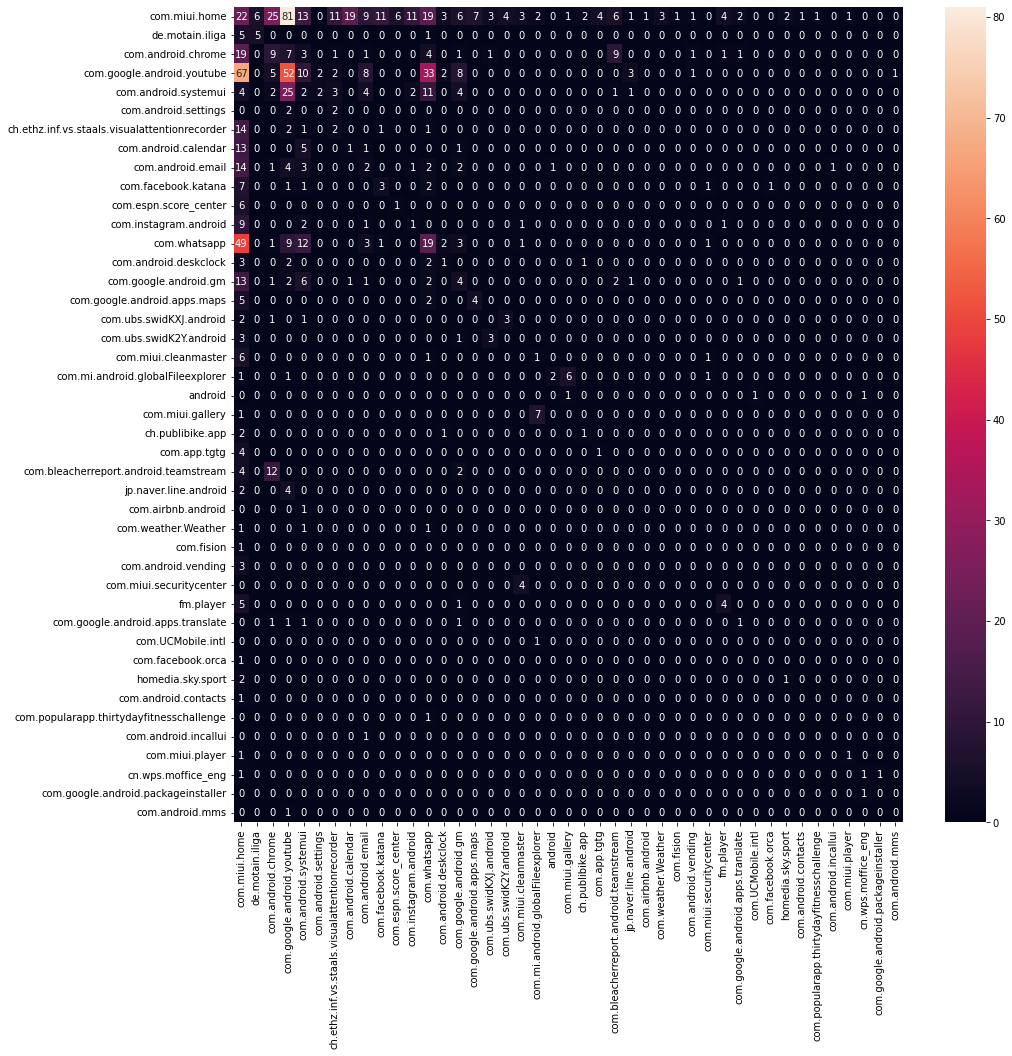

In [ ]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(arr,annot=True,xticklabels=unique_apps,yticklabels=unique_apps)
#plt.savefig('9815_transition.png')

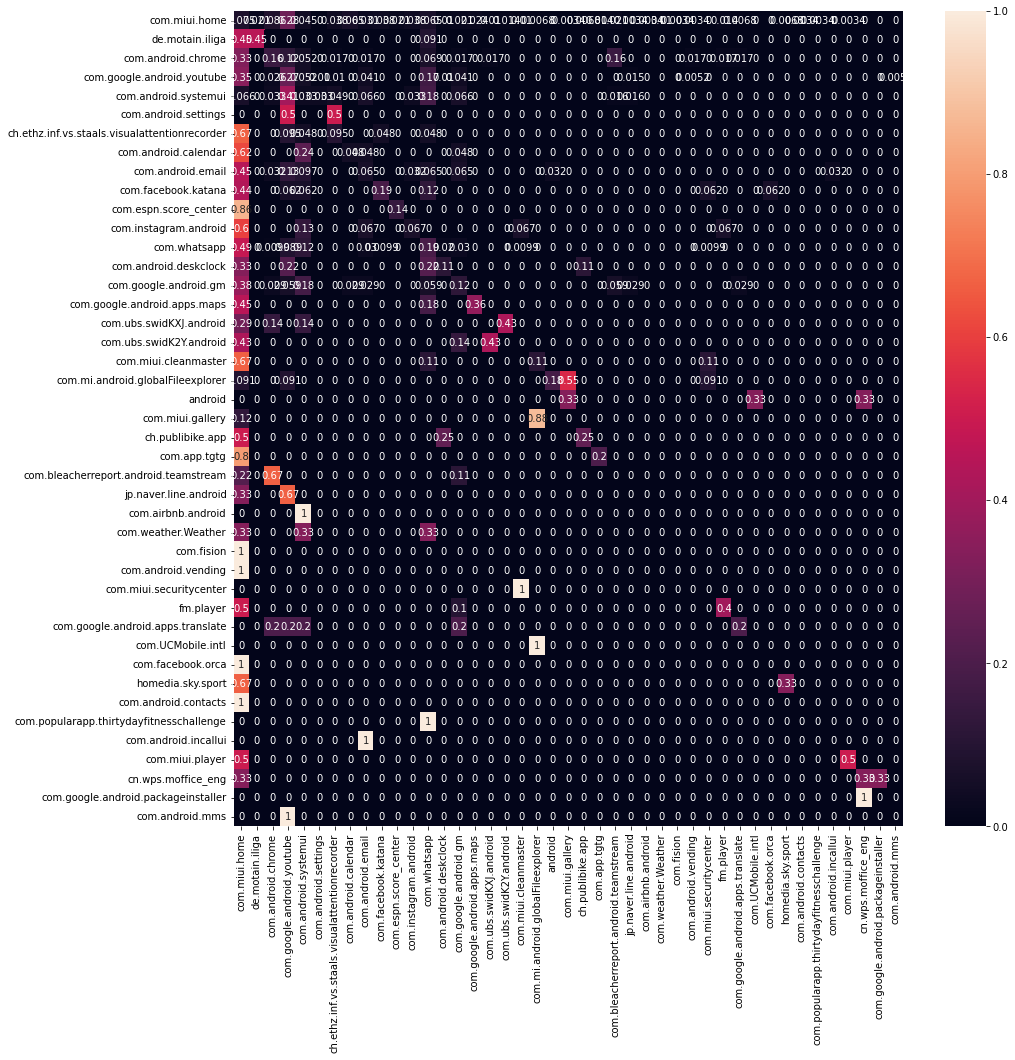

In [ ]:
# Probablity heatmap

p_arr = np.array(p_matrix)
plt.figure(figsize=(15,15))
ax = sns.heatmap(p_arr,annot=True,xticklabels=unique_apps,yticklabels=unique_apps)


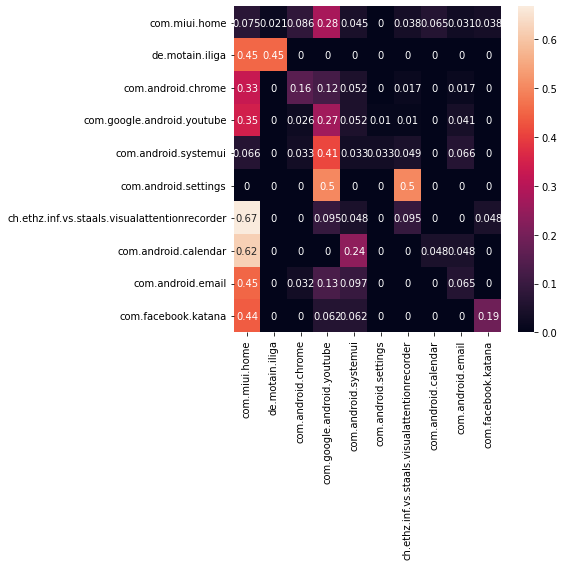

In [ ]:
# Transition matrix of top 10 applications
s_arr = p_arr[0:10,0:10]
plt.figure(figsize=(6,6))
s_ax = sns.heatmap(s_arr,annot=True,xticklabels=unique_apps[0:10],yticklabels=unique_apps[0:10])
#plt.savefig('9815_10_apps_transition.png')

### Mask the home app and then create a transition matrix:


In [ ]:
# Exclude the android launcher app

mask = app_data['name'].isin(['com.miui.home'])
m_app_data = app_data[~mask]
m_app_data

,name,time,timeDate
1,de.motain.iliga,12541825530267,17.08.2019 22:13:04.788
2,de.motain.iliga,12547920141411,17.08.2019 22:13:10.883
3,de.motain.iliga,12752411917992,17.08.2019 22:16:35.375
4,de.motain.iliga,13319194997238,17.08.2019 22:26:02.158
6,com.android.chrome,13321374350987,17.08.2019 22:26:04.337
...,...,...,...
1000,fm.player,122347764853662,21.08.2019 18:17:16.601
1002,ch.ethz.inf.vs.staals.visualattentionrecorder,122364429444646,21.08.2019 18:17:33.265
1003,com.android.systemui,49673193163758,20.08.2019 22:06:04.360
1004,com.google.android.youtube,49674746280424,20.08.2019 22:06:05.913


In [ ]:
m_unique_apps = m_app_data.name.unique()

In [ ]:
n = len(m_unique_apps)

In [ ]:
# Change  the string app name to integer
app_names = m_app_data.name.unique() # Different app names used in the data
changed_names = list(range(n)) # New app names

m_app_data = m_app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new names
m_app_data

,name,time,timeDate
1,0,12541825530267,17.08.2019 22:13:04.788
2,0,12547920141411,17.08.2019 22:13:10.883
3,0,12752411917992,17.08.2019 22:16:35.375
4,0,13319194997238,17.08.2019 22:26:02.158
6,1,13321374350987,17.08.2019 22:26:04.337
...,...,...,...
1000,30,122347764853662,21.08.2019 18:17:16.601
1002,5,122364429444646,21.08.2019 18:17:33.265
1003,3,49673193163758,20.08.2019 22:06:04.360
1004,2,49674746280424,20.08.2019 22:06:05.913


In [ ]:
# Total tranisitions by the participant

m_transitions = m_app_data.name
m_transitions = m_transitions.astype(np.int8) # Convert to type int8
m_transitions

1        0
2        0
3        0
4        0
6        1
        ..
1000    30
1002     5
1003     3
1004     2
1006     3
Name: name, Length: 715, dtype: int8

In [ ]:
# Create the tansition matrix
m_t_matrix = transition_matrix(m_transitions)

for row in m_t_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [ ]:
# to check the correctness
total=sum(map(sum, m_t_matrix))
print(total)

714


In [ ]:
# Convert the transition matrix to a numpy array for the heatmap
m_arr = np.array(m_t_matrix)

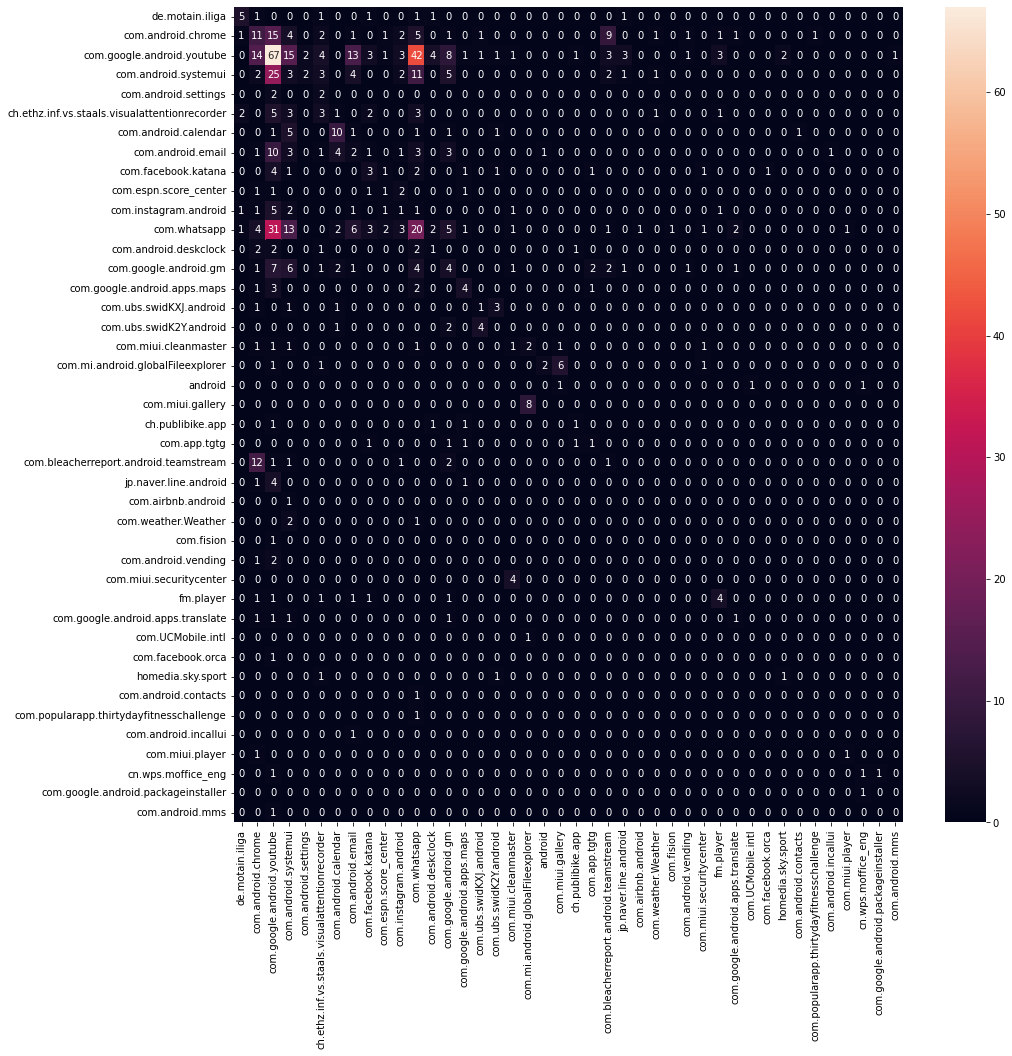

In [ ]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(15,1))
ax = sns.heatmap(m_arr,annot=True,xticklabels=m_unique_apps,yticklabels=m_unique_apps)
#plt.savefig('9815_Masked_transition.png')

In [ ]:
# Masked Probablity matrix

p_m_t_matrix = p_transition_matrix(m_transitions)

for row in p_m_t_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [ ]:
# Convert the transition matrix to a numpy array for the heatmap
p_m_arr = np.array(p_m_t_matrix)

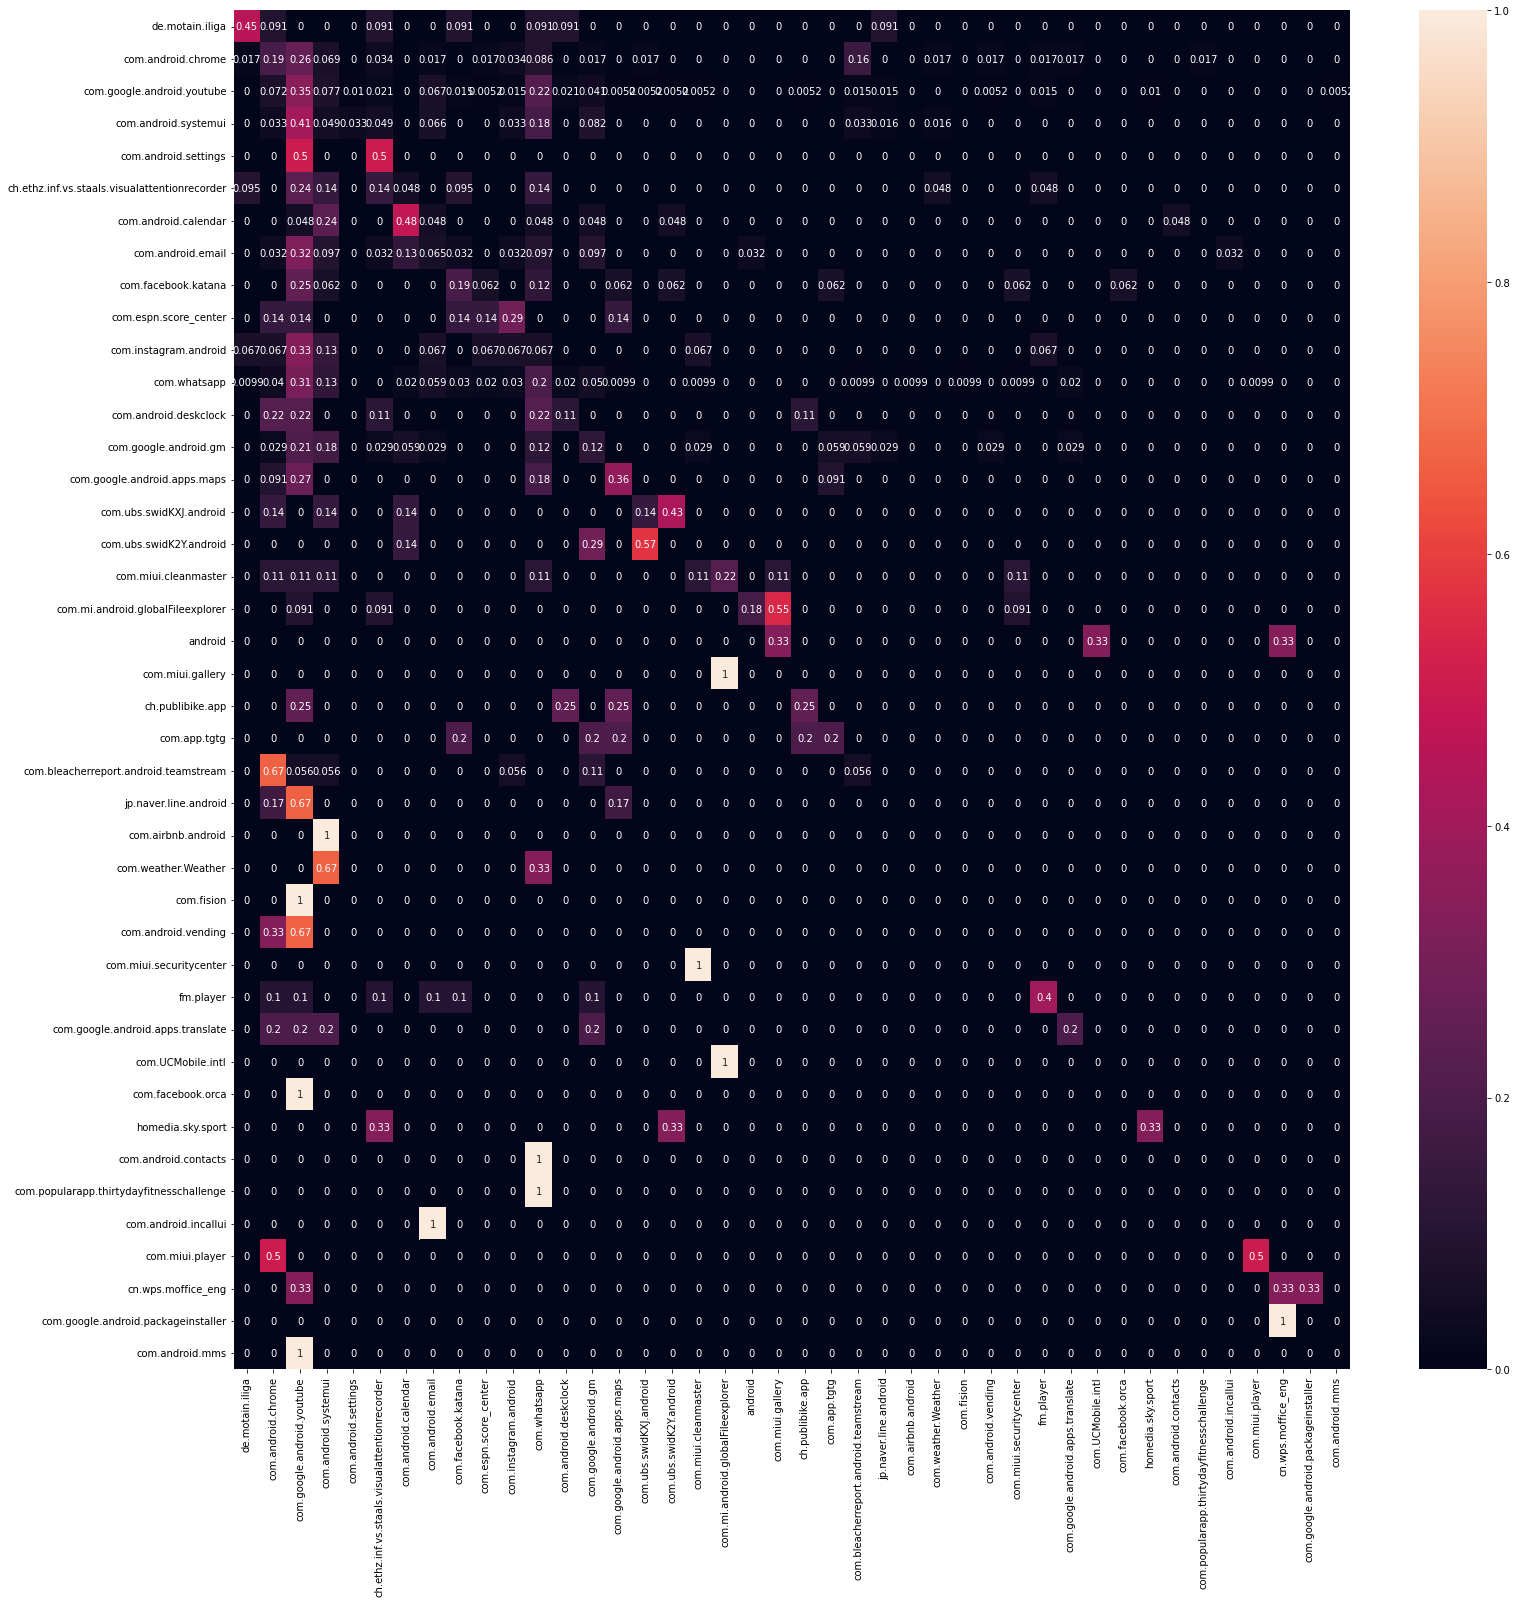

In [ ]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(25,25))
ax = sns.heatmap(p_m_arr,annot=True,xticklabels=m_unique_apps,yticklabels=m_unique_apps)
plt.savefig('9815_m_probablity.png')

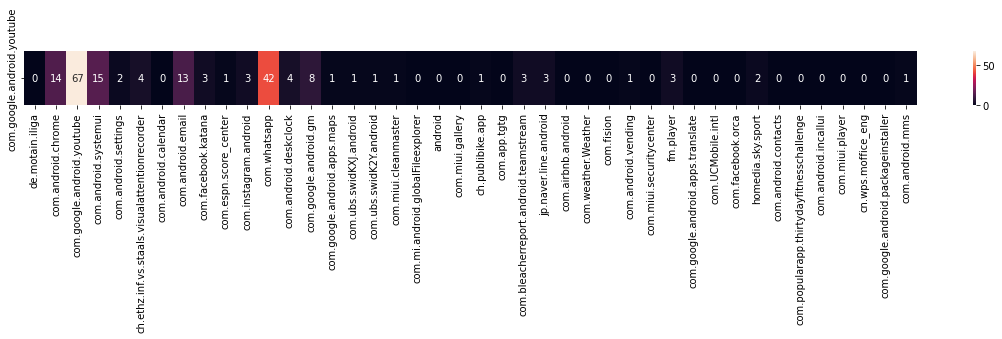

In [ ]:
# Transition of only youtube
y_arr = m_arr[2:3,:]
plt.figure(figsize=(20,1))
s_ax = sns.heatmap(y_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[2:3])
plt.savefig('9815_y2all_transition.png',bbox_inches='tight')

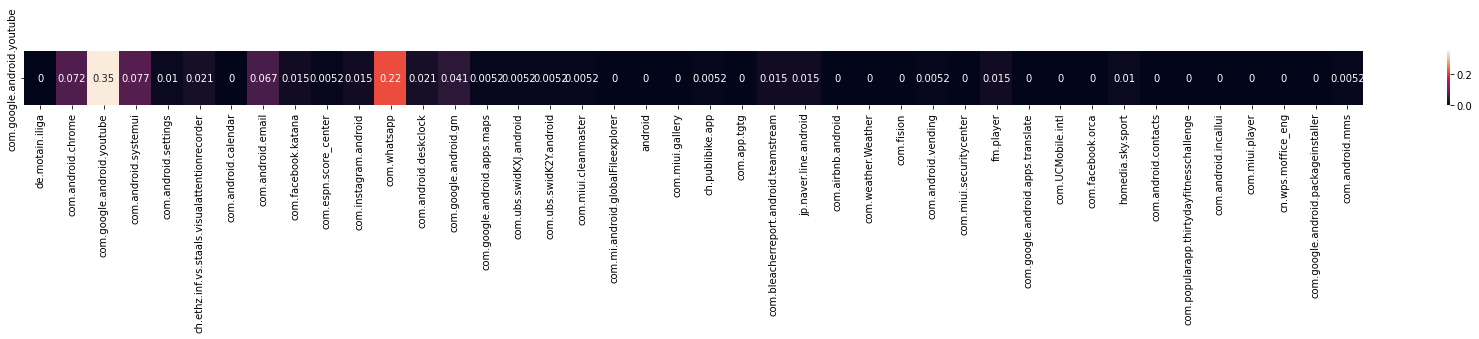

In [ ]:
# Probablity of Transition of only youtube
p_y_arr = p_m_arr[2:3,:]
plt.figure(figsize=(30,1))
s_ax = sns.heatmap(p_y_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[2:3])
#plt.savefig('9815_m_10_apps_transition.png')

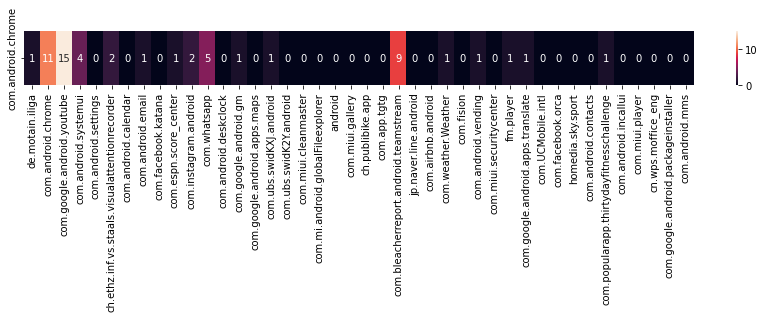

In [ ]:
# Transition of only chrome
c_arr = m_arr[1:2,:]
plt.figure(figsize=(15,1))
s_ax = sns.heatmap(c_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[1:2])
plt.savefig('9815_c2all_transition.png',bbox_inches='tight')

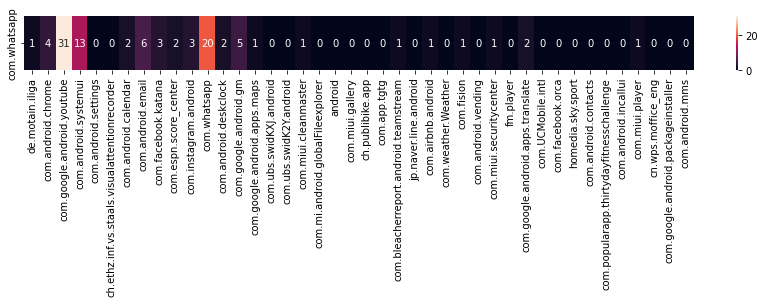

In [ ]:
# Transition of only whatsapp
w_arr = m_arr[11:12,:]
plt.figure(figsize=(15,1))
s_ax = sns.heatmap(w_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[11:12])
plt.savefig('9815_w2all_transition.png',bbox_inches='tight')

     - Whatsapp to youtube(31),email(gmail, 11),chrome,facebook,translate